# <font color= #D30971> 1.1 Péndulo Esférico

### <font color= #4B1393> 1.2 OBJETIVOS

<Strong> 1.1 Objetivo General </Strong> 

- Encontrar una manera de simular y analizar el comportamiento del péndulo esférico con diferentes condiciones iniciales a partir de sus ecuaciones diferenciales y las herramientas que nos da Python.

<Strong> 1.2 Objetivos Específicos </Strong>

- Simular y analizar el comportamiento del pendulo esférico, cónico y simple a partir de su ecuación diferencial 

### <font color= #4B1393> 1.3 MODELO QUE REPRESENTA EL PROBLEMA.

<Strong>-Ecuación diferencial:</Strong> $L=4πσR^2T^4$

<Strong>-Características:</Strong> La luminosidad ...

<Strong>-Variables:</Strong> 
L = luminosidad (W);
T = temperatura (K);
R = radio (m).


### <font color= #4B1393> 1.4 & 1.5 SIMULACIONES Y VISUALIZACIÓN DE RESULTADOS.

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos la función
def f(x, t, g, l):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    dx = [x2, 
          x4**2*np.sin(x1)*np.cos(x1)-g/l*np.sin(x1), 
          x4,
          2*x2*x4*np.cos(x1)/np.sin(x1)]
   
    return dx

In [3]:
# Definimos parametros
g = 9.76
l = 0.65

## CASO 1 : FLORESITA

In [4]:
# Definimos condiciones iniciales theta, dtheta, phi, dphi
x0 = [np.pi/4,np.pi,0,np.pi/12]

# Definimos vector de tiempo
t = np.linspace(0, 10, 10000)

# Resolver el sistema
x = odeint(f, x0, t, args=(g, l))


In [5]:
# Graficamos theta vs t
#plt.plot(t, x[:,0])
#plt.plot(t, x[:,2])
#tabla de valores
print(x)
theta = x[:,0]
dtheta = x[:,1]
phi = x[:,2]
dhi = x[:,3]
x = l*np.sin(theta)*np.cos(phi)
y = l*np.sin(theta)*np.sin(phi)
z = -l*np.cos(theta)

[[ 7.85398163e-01  3.14159265e+00  0.00000000e+00  2.61799388e-01]
 [ 7.88534769e-01  3.13099197e+00  2.62646821e-04  2.63441695e-01]
 [ 7.91660762e-01  3.12035854e+00  5.26934160e-04  2.65078390e-01]
 ...
 [-1.15188040e+00 -1.01978450e+00  3.87806203e+00  8.50275502e-01]
 [-1.15289356e+00 -1.00633170e+00  3.87891277e+00  8.51041975e-01]
 [-1.15389326e+00 -9.92872748e-01  3.87976428e+00  8.51796894e-01]]


In [6]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [7]:
from ipywidgets import *

In [8]:
tiempo = np.linspace(0,10000,1)

In [9]:
def bolita(t=0):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, y, z, label='Oscilación en 3D')
    ax.scatter(x[t],y[t],z[t],s=100, c="r")
    fig.canvas.draw()

In [10]:
t_f = 10000-1

In [11]:
interact(bolita,t=(0,t_f,1))

interactive(children=(IntSlider(value=0, description='t', max=9999), Output()), _dom_classes=('widget-interact',))

<function __main__.bolita>

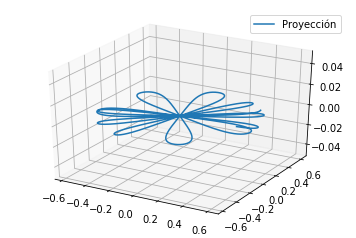

In [12]:
#Para gráfica 2d, proyección
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, label='Proyección')
ax.legend()
plt.show()

## CASO 2: PÉNDULO CÓNICO

In [13]:
# Definimos condiciones iniciales theta, dtheta, phi, dphi
x0 = [np.pi/4, np.pi/12,0, np.pi*2]

# Definimos vector de tiempo
t = np.linspace(0, 10, 10000)

# Resolver el sistema
xd = odeint(f, x0, t, args=(g, l))

In [14]:
# Graficamos theta vs t
#plt.plot(t, x[:,0])
#plt.plot(t, x[:,2])
#ensenandole comentarios a susi
#tabla de valores
print(xd)
theta = xd[:,0]
dtheta = xd[:,1]
phi = xd[:,2]
dhi = xd[:,3]
xd = l*np.sin(theta)*np.cos(phi)
yd = l*np.sin(theta)*np.sin(phi)
zd = -l*np.cos(theta)

[[7.85398163e-01 2.61799388e-01 0.00000000e+00 6.28318531e+00]
 [7.85664554e-01 2.70931094e-01 6.28548053e-03 6.28653287e+00]
 [7.85940086e-01 2.80081318e-01 1.25743648e-02 6.28999531e+00]
 ...
 [8.57039097e-01 1.31693100e+00 9.47991227e+01 7.18037343e+00]
 [8.58363259e-01 1.33114395e+00 9.48063120e+01 7.19683965e+00]
 [8.59701683e-01 1.34545166e+00 9.48135179e+01 7.21347672e+00]]


In [15]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [16]:
def bolita2(t=0):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(xd, yd, zd, label='Oscilación en 3D')
    ax.scatter(xd[t],yd[t],zd[t],s=100, c="r")
    fig.canvas.draw()

In [17]:
interact(bolita2,t=(0,t_f,1))

interactive(children=(IntSlider(value=0, description='t', max=9999), Output()), _dom_classes=('widget-interact',))

<function __main__.bolita2>

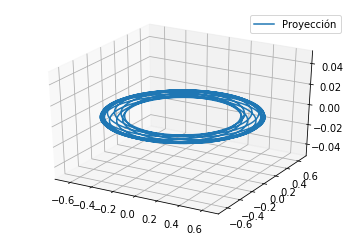

In [18]:
#Para gráfica 2d, proyección
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xd, yd, label='Proyección')
ax.legend()
plt.show()

## CASO 3: PÉNDULO SIMPLE

In [19]:
# Definimos condiciones iniciales theta, dtheta, phi, dphi
x0 = [np.pi/4,0,0,0]

# Definimos vector de tiempo
t = np.linspace(0, 10, 10000)

# Resolver el sistema
xt = odeint(f, x0, t, args=(g, l))


In [20]:
# Graficamos theta vs t
#plt.plot(t, x[:,0])
#plt.plot(t, x[:,2])
#ensenandole comentarios a susi
#tabla de valores
print(xt)
theta = xt[:,0]
dtheta = xt[:,1]
phi = xt[:,2]
dhi = xt[:,3]
xt = l*np.sin(theta)*np.cos(phi)
yt = l*np.sin(theta)*np.sin(phi)
zt = -l*np.cos(theta)

[[ 0.78539816  0.          0.          0.        ]
 [ 0.78539285 -0.01061852  0.          0.        ]
 [ 0.78537692 -0.02123692  0.          0.        ]
 ...
 [ 0.71021224  1.23898117  0.          0.        ]
 [ 0.71144645  1.22918321  0.          0.        ]
 [ 0.71267085  1.21937126  0.          0.        ]]


In [21]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [22]:
def bolita3(t=0):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(xt, yt, zt, label='Oscilación en 3D')
    ax.scatter(xt[t],yt[t],zt[t],s=100, c="r")
    fig.canvas.draw()

In [23]:
interact(bolita3,t=(0,t_f,1))

interactive(children=(IntSlider(value=0, description='t', max=9999), Output()), _dom_classes=('widget-interact',))

<function __main__.bolita3>

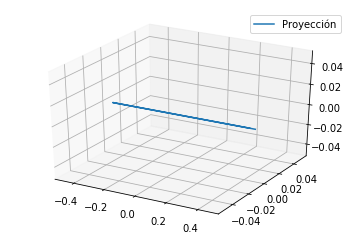

In [24]:
#Para gráfica 2d, proyección
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xt, yt, label='Proyección')
ax.legend()
plt.show()

### <font color= #4B1393> 1.6 CONCLUSIONES.

Pudimos trabajar con varias herramientas de python que nos mostraron el comportamiento de fenomenos como los diversos casos del péndulo sin tener que llevar a la vida real estos modelos que probablemente nos hubiera llevado más tiempo, cumpliendo el objetivo de la clase Simulación matemática.

### <font color= #4B1393> 1.7 REFERENCIAS.